In [97]:
import pandas as pd
import numpy as np
import matplotlib
%matplotlib inline
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import PolynomialFeatures
import warnings
warnings.filterwarnings("ignore")
np.random.seed(42)

In [98]:
ln_train = pd.read_csv("train_model.csv")

In [99]:
ln_test = pd.read_csv("test_model.csv")

In [100]:
ln_train.shape

(13999, 120)

In [101]:
ln_test.shape

(5806, 120)

In [102]:
ln_train.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_ult1,imp_op_var41_comer_ult1,imp_op_var41_comer_ult3,...,saldo_medio_var13_largo_hace3,saldo_medio_var13_largo_ult1,saldo_medio_var13_largo_ult3,saldo_medio_var17_ult3,saldo_medio_var33_hace3,saldo_medio_var33_ult3,saldo_medio_var44_hace3,var38,TARGET,TARGET_VAL
0,142882,2,55,30.0,17.73,17.73,0.00,0.0,17.73,17.73,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,59375.97,2807855.303,1
1,116073,2,26,0.0,0.00,0.00,0.00,0.0,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117951.42,0.000,0
2,40727,2,31,180.0,1051.86,1145.91,0.00,0.0,1051.86,1145.91,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,81164.61,0.000,0
3,96753,89,55,0.0,1353.03,1998.81,990.75,0.0,362.28,362.28,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,137912.85,0.000,0
4,105319,2,24,0.0,0.00,0.00,0.00,0.0,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40407.66,0.000,0


In [103]:
result=pd.read_csv("Result Evaluation.csv")

In [104]:
result.head()

,ID,TARGET
0,64252,0.0
1,31278,0.0
2,148245,0.0
3,133657,0.0
4,68463,0.0


In [105]:
result['TARGET']= np.where(result['TARGET']>0,1,0)

In [106]:
result.TARGET.value_counts()

0    5282
1     524
Name: TARGET, dtype: int64

In [83]:
ln_train.columns

Index(['ID', 'var3', 'var15', 'imp_ent_var16_ult1', 'imp_op_var39_comer_ult1',
       'imp_op_var39_comer_ult3', 'imp_op_var40_comer_ult1',
       'imp_op_var40_ult1', 'imp_op_var41_comer_ult1',
       'imp_op_var41_comer_ult3',
       ...
       'saldo_medio_var13_largo_hace3', 'saldo_medio_var13_largo_ult1',
       'saldo_medio_var13_largo_ult3', 'saldo_medio_var17_ult3',
       'saldo_medio_var33_hace3', 'saldo_medio_var33_ult3',
       'saldo_medio_var44_hace3', 'var38', 'TARGET', 'TARGET_VAL'],
      dtype='object', length=120)

In [108]:
#Define target and ID columns:
target = 'TARGET_VAL'
IDcol = ['ID']
adCol = ['TARGET']
#adCol=['Gender_Female', 'Gender_Male', 'Married_No', 
#       'Married_Yes','Self_Employed_No', 'Self_Employed_Yes', 'Dependents']

from sklearn.metrics import accuracy_score

from sklearn import cross_validation, metrics 
from sklearn.model_selection import cross_val_score

def modelfit(alg, dtrain, dtest, predictors, target, IDcol, filename):
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain[target])
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])

    #Perform cross-validation:
    cv_score = cross_validation.cross_val_score(alg, dtrain[predictors], dtrain[target], cv=20, scoring='accuracy')
    cv_score = np.mean(cv_score)
    
    #Print model report:
    print("\nModel Report",  end = ': ')
    print("Accuracy : %.4g" % np.mean(cv_score))
    
    #Predict on testing data:
    dtest[target] = alg.predict(dtest[predictors])
    
    #Export submission file:
    IDcol.append(target)
    submission = pd.DataFrame({ x: dtest[x] for x in IDcol})
    submission.to_csv(filename, index=False)



In [85]:
from sklearn import cross_validation, metrics,model_selection
from sklearn.metrics import accuracy_score,f1_score
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

   
#Define target and ID columns:
target = 'TARGET'
IDcol = ['ID']

def modelfit2(alg, train, test,predictors):

     #Fit the algorithm on the data
    alg.fit(train[predictors],train[target])
        
    #Predict training set:
    
    trainpred = alg.predict(train[predictors])

    
    #Predict on testing data:
    test[target] = alg.predict(test[predictors])
    
    print('F1 score in train:', f1_score(train[target],trainpred,average='weighted'))
                
    print('F1 score in test:', f1_score(result[target],test[target],average='weighted'))

In [109]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

predictors = [x for x in ln_train.columns if x not in [target]+IDcol+adCol]
#predictors = [x for x in ln_train.columns if x in[adCol]]
print(predictors)
              
#for n_estimators in range(20,200,20):
alg1 = RandomForestClassifier(bootstrap=True,min_samples_leaf=3,n_estimators=300,min_samples_split=10,
                          max_features='auto',max_depth=10)
#                          max_features='sqrt',max_depth=10)
modelfit(alg1, ln_train, ln_test, predictors, target,IDcol,'rand_forest.csv')
#modelfit2(alg1, ln_train, ln_test, predictors)

['var3', 'var15', 'imp_ent_var16_ult1', 'imp_op_var39_comer_ult1', 'imp_op_var39_comer_ult3', 'imp_op_var40_comer_ult1', 'imp_op_var40_ult1', 'imp_op_var41_comer_ult1', 'imp_op_var41_comer_ult3', 'imp_op_var41_efect_ult1', 'imp_op_var41_efect_ult3', 'imp_op_var41_ult1', 'imp_op_var39_efect_ult3', 'imp_op_var39_ult1', 'imp_sal_var16_ult1', 'num_var4', 'num_var5', 'num_var12_0', 'num_var13_0', 'num_var14_0', 'num_var14', 'num_var17_0', 'num_var17', 'num_var24_0', 'num_var26_0', 'num_var26', 'num_var25_0', 'num_var25', 'num_op_var40_ult3', 'num_op_var41_hace2', 'num_op_var41_hace3', 'num_op_var41_ult1', 'num_op_var41_ult3', 'num_op_var39_ult3', 'num_var30_0', 'num_var30', 'num_var31_0', 'num_var31', 'num_var32', 'num_var33_0', 'num_var33', 'num_var35', 'num_var37_med_ult2', 'num_var37_0', 'num_var37', 'num_var39_0', 'num_var41_0', 'num_var42_0', 'num_var42', 'saldo_var5', 'saldo_var8', 'saldo_var13_largo', 'saldo_var14', 'saldo_var30', 'saldo_var31', 'saldo_var33', 'saldo_var40', 'saldo_v

In [26]:
#Define target and ID columns:
target = 'TARGET'
IDcol = ['ID']
adCol = ['TARGET_VAL']
from sklearn import cross_validation, metrics

def modelfit_reg(alg, dtrain, dtest, predictors, target, IDcol, filename):
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain[target])
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])

    #Perform cross-validation:
    cv_score = cross_validation.cross_val_score(alg, dtrain[predictors], dtrain[target], cv=20, scoring='mean_squared_error')
    cv_score = np.sqrt(np.abs(cv_score))
    
    #Print model report:
    print("\nModel Report")
    print("RMSE : %.4g" % np.sqrt(metrics.mean_squared_error(dtrain[target].values, dtrain_predictions)))
    
    #Predict on testing data:
    dtest[target] = alg.predict(dtest[predictors])
    
    #Export submission file:
    IDcol.append(target)
    submission = pd.DataFrame({ x: dtest[x] for x in IDcol})
    submission.to_csv(filename, index=False)


predictors :  ['var3', 'var15', 'imp_ent_var16_ult1', 'imp_op_var39_comer_ult1', 'imp_op_var39_comer_ult3', 'imp_op_var40_comer_ult1', 'imp_op_var40_ult1', 'imp_op_var41_comer_ult1', 'imp_op_var41_comer_ult3', 'imp_op_var41_efect_ult1', 'imp_op_var41_efect_ult3', 'imp_op_var41_ult1', 'imp_op_var39_efect_ult3', 'imp_op_var39_ult1', 'imp_sal_var16_ult1', 'num_var4', 'num_var5', 'num_var12_0', 'num_var13_0', 'num_var14_0', 'num_var14', 'num_var17_0', 'num_var17', 'num_var24_0', 'num_var26_0', 'num_var26', 'num_var25_0', 'num_var25', 'num_op_var40_ult3', 'num_op_var41_hace2', 'num_op_var41_hace3', 'num_op_var41_ult1', 'num_op_var41_ult3', 'num_op_var39_ult3', 'num_var30_0', 'num_var30', 'num_var31_0', 'num_var31', 'num_var32', 'num_var33_0', 'num_var33', 'num_var35', 'num_var37_med_ult2', 'num_var37_0', 'num_var37', 'num_var39_0', 'num_var41_0', 'num_var42_0', 'num_var42', 'saldo_var5', 'saldo_var8', 'saldo_var13_largo', 'saldo_var14', 'saldo_var30', 'saldo_var31', 'saldo_var33', 'saldo_va

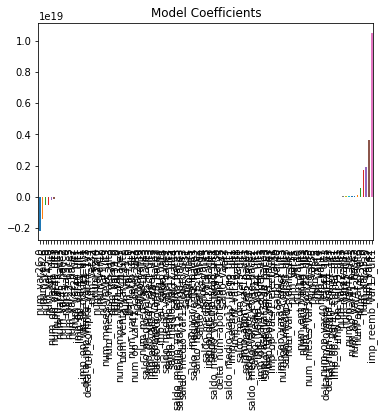

In [29]:
from sklearn.linear_model import LinearRegression
predictors = [x for x in ln_train.columns if x not in [target]+IDcol+adCol]
print("predictors : ",predictors)
# print predictors
alg1 = LinearRegression(normalize=True)
modelfit_reg(alg1, ln_train, ln_test, predictors, target, IDcol, 'lin_reg.csv')
coef1 = pd.Series(alg1.coef_, predictors).sort_values()
coef1.plot(kind='bar', title='Model Coefficients')